In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Preproessing Approach 2 - Sahil Rai

## 1.1 Load data

In [2]:
df_trainV2 = pd.read_csv('training_set_features.csv', index_col='respondent_id')
df_testV2 = pd.read_csv('test_set_features.csv', index_col='respondent_id')
df_labelsV2 = pd.read_csv('training_set_labels.csv', index_col='respondent_id')

In [3]:
df_trainV2 = df_trainV2.merge(df_labelsV2,  on='respondent_id')
df_testV2 = df_testV2.merge(df_labelsV2,  on='respondent_id')

In [4]:
df_trainV2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [5]:
print(df_testV2.shape)
print(df_testV2.shape)

(0, 37)
(0, 37)


In [6]:
df_trainV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [7]:
missingdataV2 = df_trainV2.notnull()
for column in missingdataV2.columns.values.tolist():
    print(column)
    print (missingdataV2[column].value_counts())
    print("") 

h1n1_concern
True     26615
False       92
Name: h1n1_concern, dtype: int64

h1n1_knowledge
True     26591
False      116
Name: h1n1_knowledge, dtype: int64

behavioral_antiviral_meds
True     26636
False       71
Name: behavioral_antiviral_meds, dtype: int64

behavioral_avoidance
True     26499
False      208
Name: behavioral_avoidance, dtype: int64

behavioral_face_mask
True     26688
False       19
Name: behavioral_face_mask, dtype: int64

behavioral_wash_hands
True     26665
False       42
Name: behavioral_wash_hands, dtype: int64

behavioral_large_gatherings
True     26620
False       87
Name: behavioral_large_gatherings, dtype: int64

behavioral_outside_home
True     26625
False       82
Name: behavioral_outside_home, dtype: int64

behavioral_touch_face
True     26579
False      128
Name: behavioral_touch_face, dtype: int64

doctor_recc_h1n1
True     24547
False     2160
Name: doctor_recc_h1n1, dtype: int64

doctor_recc_seasonal
True     24547
False     2160
Name: doctor_recc_sea

## 1.2 Data Wrangling

From this, we can see that there are missing data which needs to be dealt with and also, object data type are occuring.
Steps for pre-processing and data wrangling
* Replace missing data with the random (due to binary nature of data set)
* Utilise binary encoding, to tranform categories to binary data 

In [8]:
#Function to return impute random value 
def random_value(column):
    dropped_value = column.dropna()
    random_choice = np.random.choice(dropped_value)
    return random_choice

#impute random values to each feature
for column in df_trainV2.columns:
    df_trainV2[column].fillna(random_value(df_trainV2[column]), inplace=True)
    
for column in df_testV2.columns:
    df_testV2[column].fillna(random_value(df_trainV2[column]), inplace=True)
    

In [9]:
print("Missing Data count in training set \n",  df_trainV2.isnull().sum())

Missing Data count in training set 
 h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_ge

No more missing values, therefore succesfully imputed. But still need to convert categories

In [10]:
df_trainV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [11]:
encode_label = LabelEncoder()
for column in df_trainV2.columns:
    if df_trainV2[column].dtype == 'object':
        df_trainV2[column] = encode_label.fit_transform(df_trainV2[column])
        
for column in df_testV2.columns:
    if df_testV2[column].dtype == 'object':
        df_testV2[column] = encode_label.fit_transform(df_testV2[column])
        
print(df_trainV2)

               h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   
...                     ...             ...                        ...   
26702                   2.0             0.0                        0.0   
26703                   1.0             2.0                        0.0   
26704                   2.0             2.0                        0.0   
26705                   1.0             1.0                        0.0   
26706                   0.0             0.0                        0.0   

               behavioral_avoidance  

In [12]:
#Checking for encoding
df_trainV2.head()
df_trainV2

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,8,2,0.0,0.0,18,21,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,1,0,0.0,0.0,12,19,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,9,0,2.0,0.0,14,21,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,1,5,1,0.0,0.0,18,21,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,9,0,1.0,0.0,18,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,9,2,0.0,0.0,18,21,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,6,1,1.0,0.0,4,2,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,1,6,0,0.0,0.0,18,21,0,1


All categories are now encoded to have binary representation.
* Now lets quickly randomise the data, so the order doesn't affect the training and testing tests.

## 2. Viusalisation

Visualisaing the vaccination count: 
* h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
* seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes.

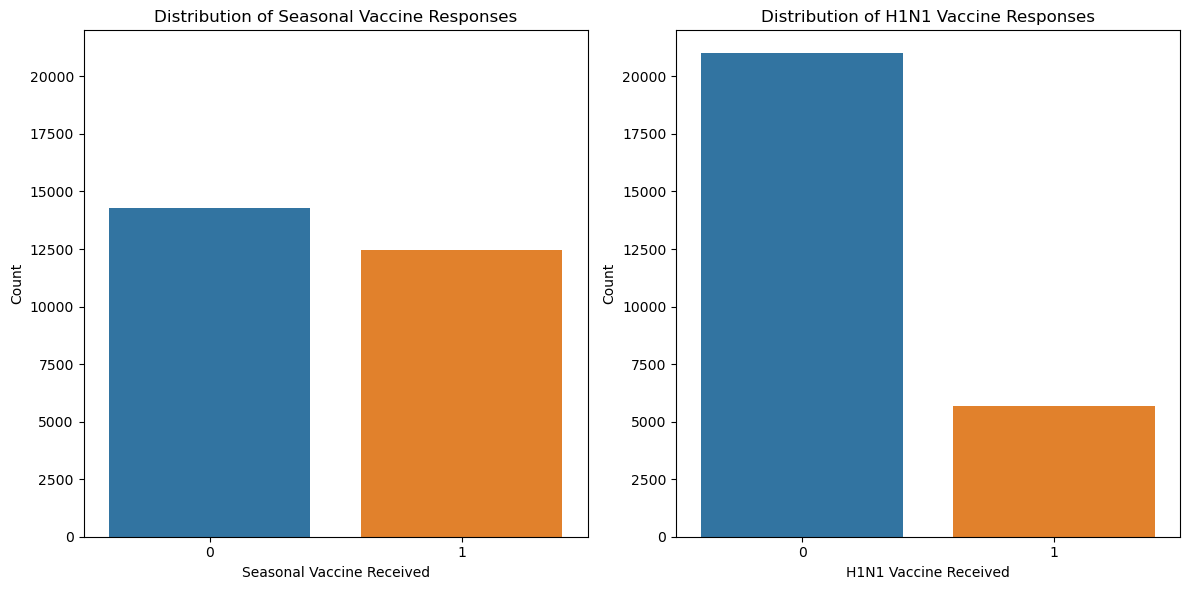

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Setting a scale to porvide a fairer comparison
max_count = 22000

#Plotting Seasonal vaccine counts
sns.countplot(x='seasonal_vaccine', data=df_labelsV2, ax=axes[0])
axes[0].set_title('Distribution of Seasonal Vaccine Responses')
axes[0].set_xlabel('Seasonal Vaccine Received')
axes[0].set_ylabel('Count')
axes[0].set_ylim([0, max_count])

#Plotting H1N1 vaccine counts
sns.countplot(x='h1n1_vaccine', data=df_labelsV2, ax=axes[1])
axes[1].set_title('Distribution of H1N1 Vaccine Responses')
axes[1].set_xlabel('H1N1 Vaccine Received')
axes[1].set_ylabel('Count')
axes[1].set_ylim([0, max_count])

plt.tight_layout()
plt.show()


This shows a balanced response for seasonal vaccination, however there is bias against H1N1 vaccination where it is more likely people haven't taken the vaccination

In [14]:
#Selecting features based on most important
features = ['opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'hhs_geo_region', 'opinion_seas_risk', 'employment_industry', 'age_group']

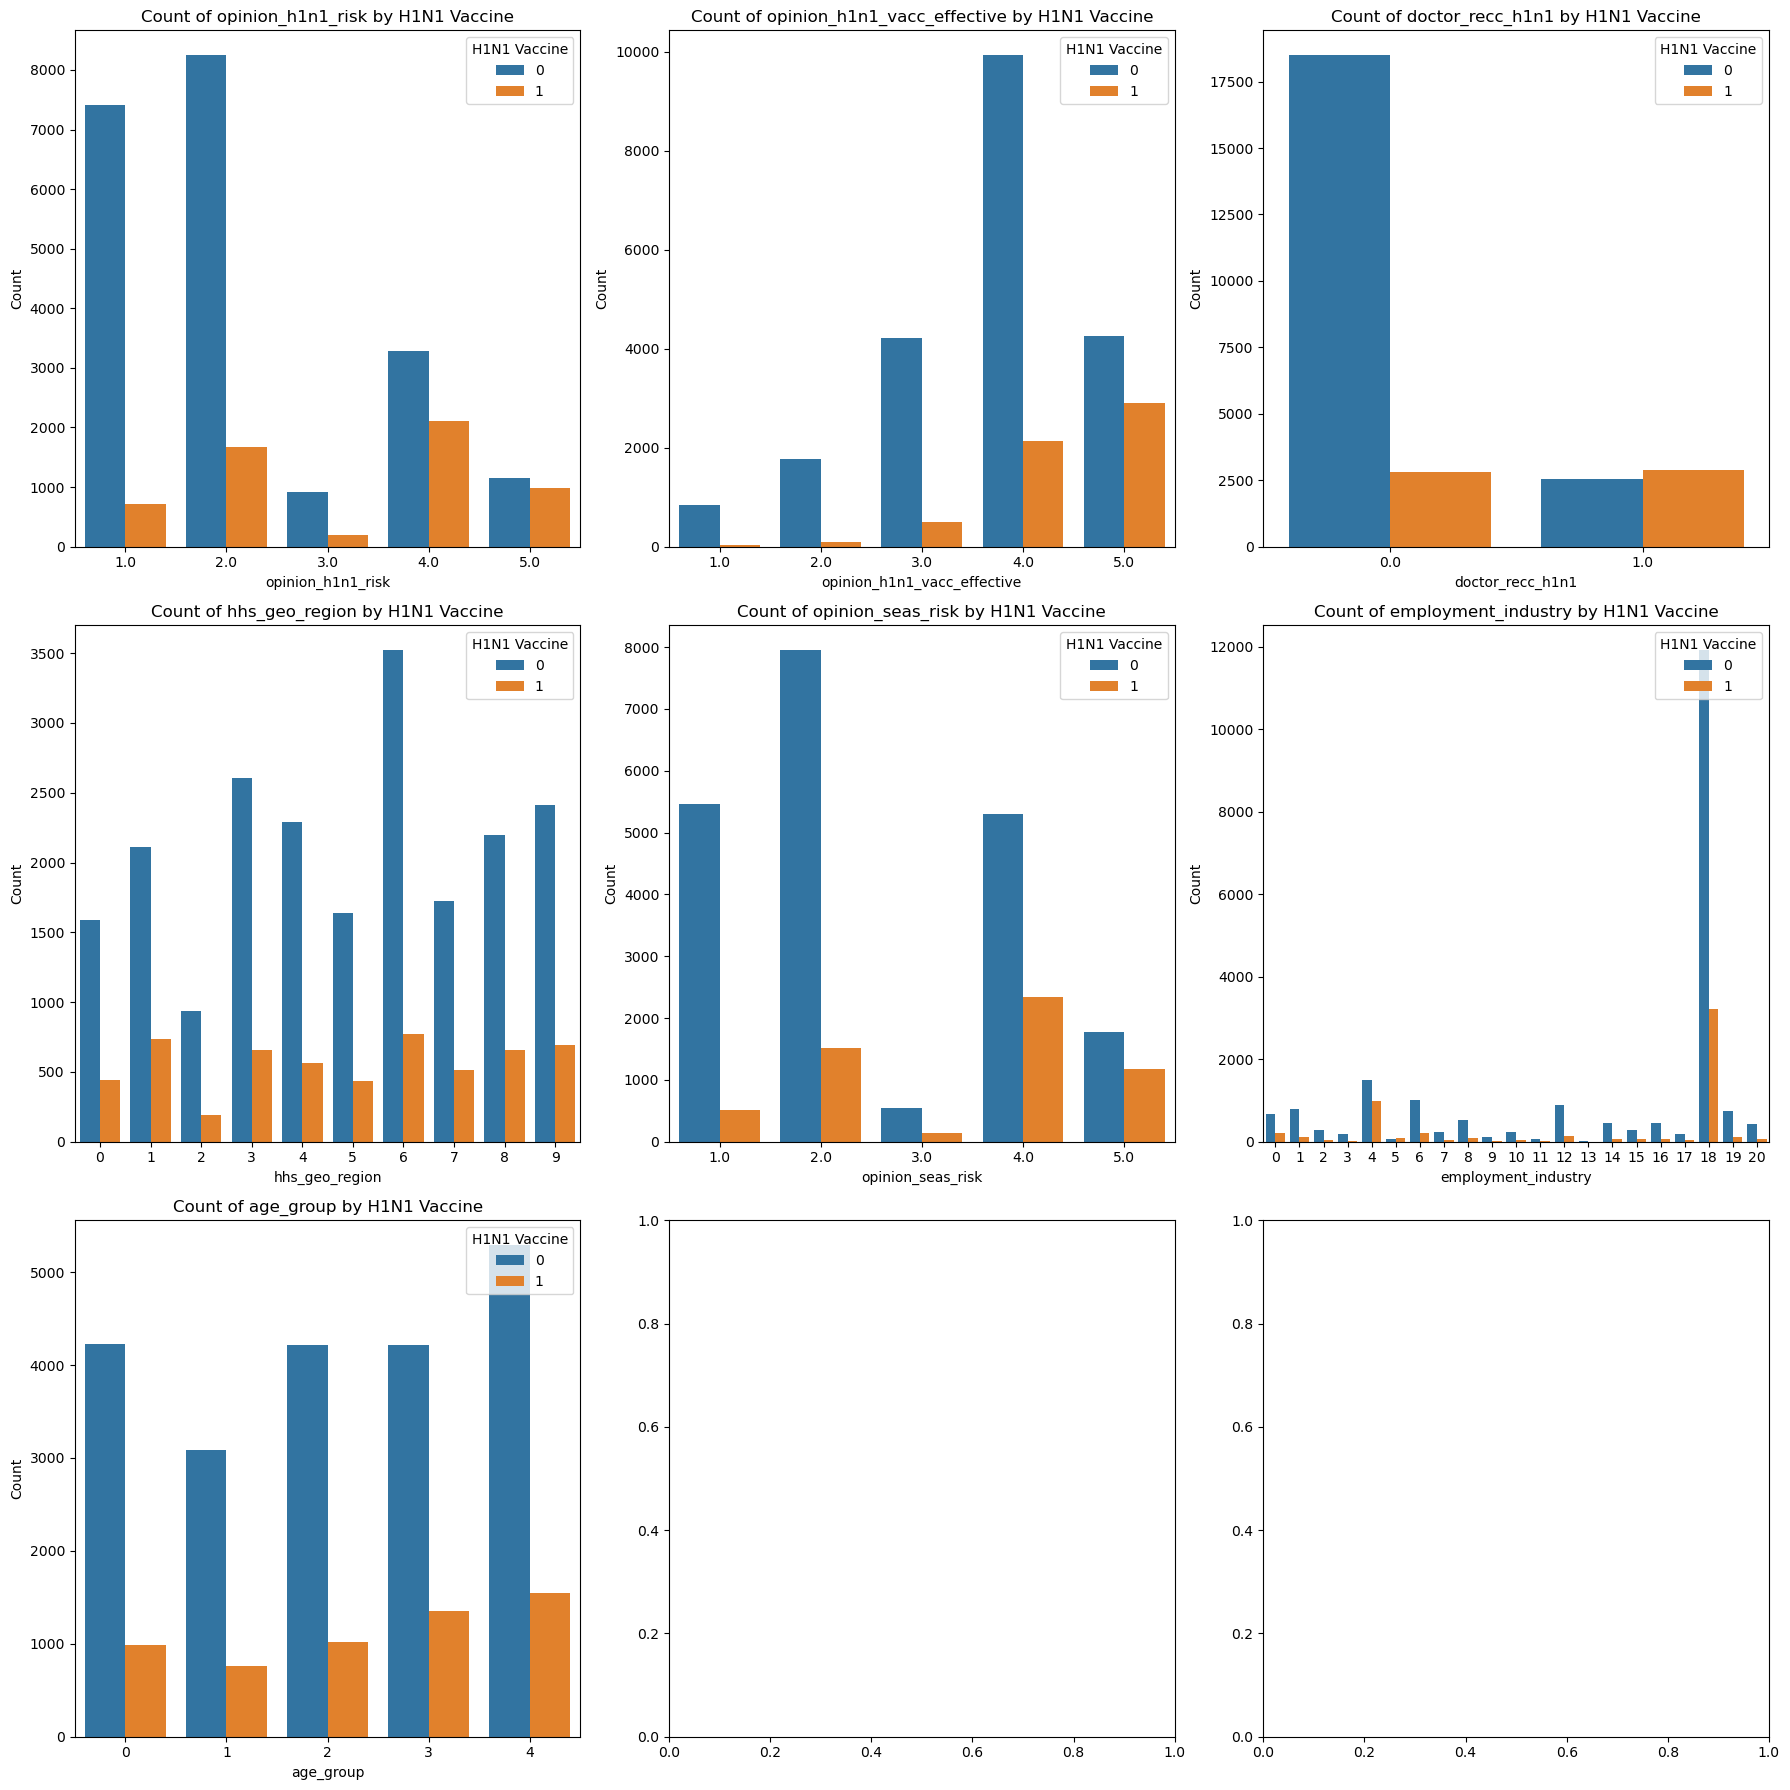

In [15]:
num_features = len(features)
num_rows = (num_features - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    sns.countplot(x=feature, hue='h1n1_vaccine', data=df_trainV2, ax=ax)
    ax.set_title(f'Count of {feature} by H1N1 Vaccine')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='H1N1 Vaccine', loc='upper right')


plt.tight_layout()
plt.show()

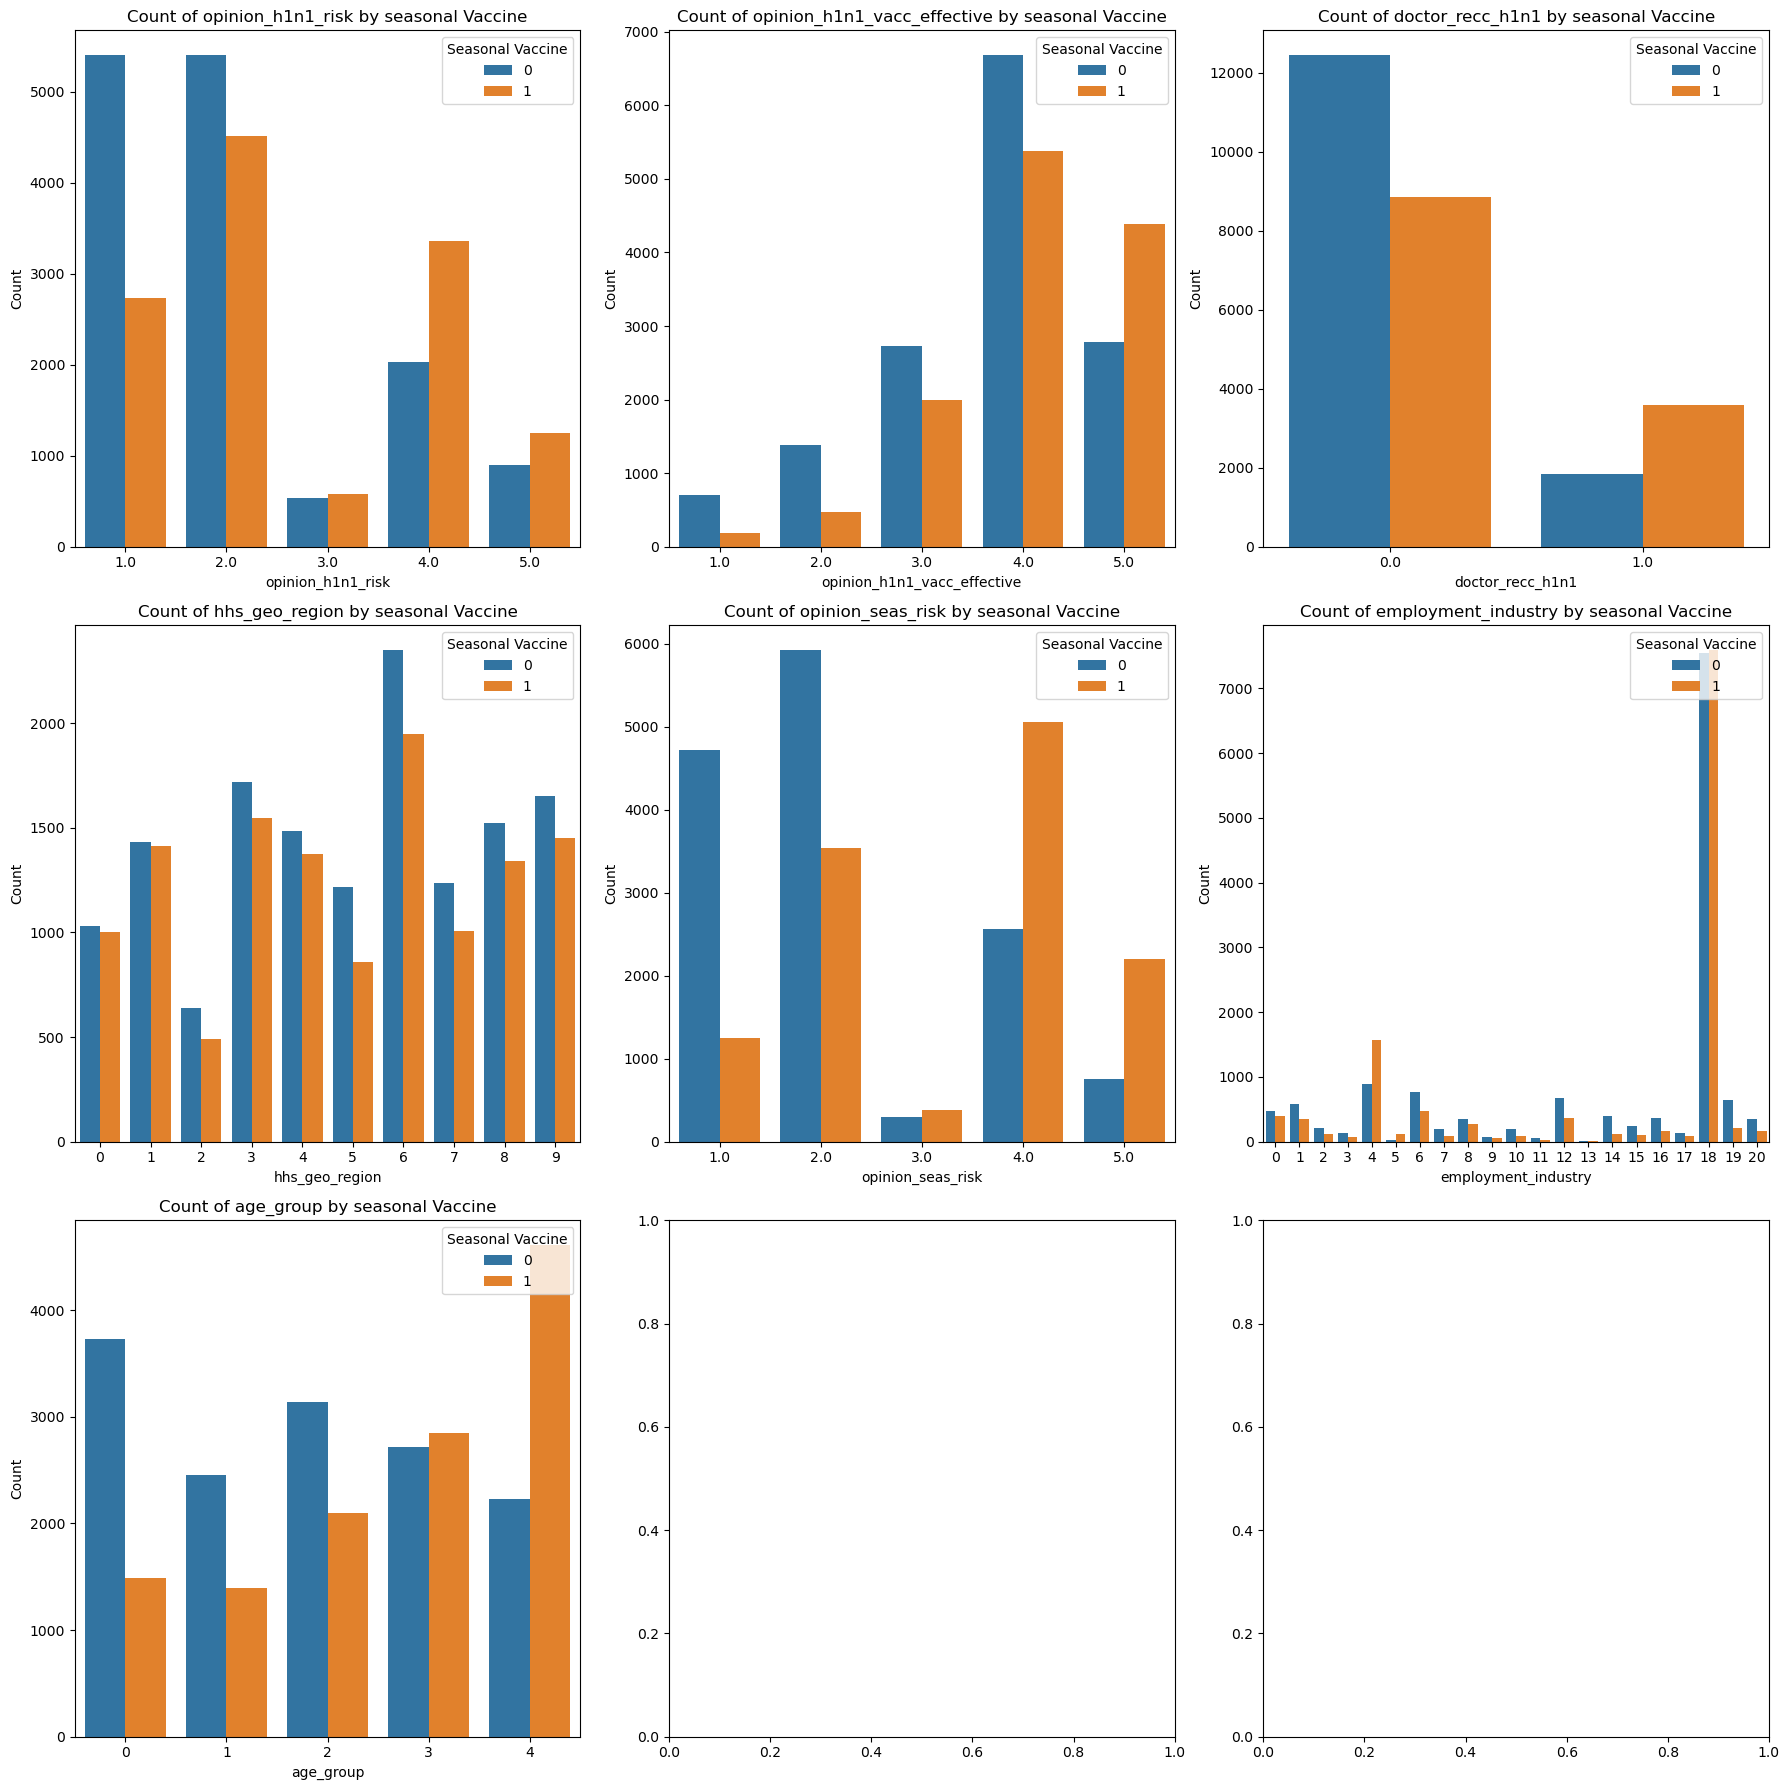

In [16]:
features = ['opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'hhs_geo_region', 'opinion_seas_risk', 'employment_industry', 'age_group']

num_features = len(features)
num_rows = (num_features - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

#Bar charts for each features 
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    sns.countplot(x=feature, hue='seasonal_vaccine', data=df_trainV2, ax=ax)
    ax.set_title(f'Count of {feature} by seasonal Vaccine')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Seasonal Vaccine', loc='upper right')

plt.tight_layout()
plt.show()

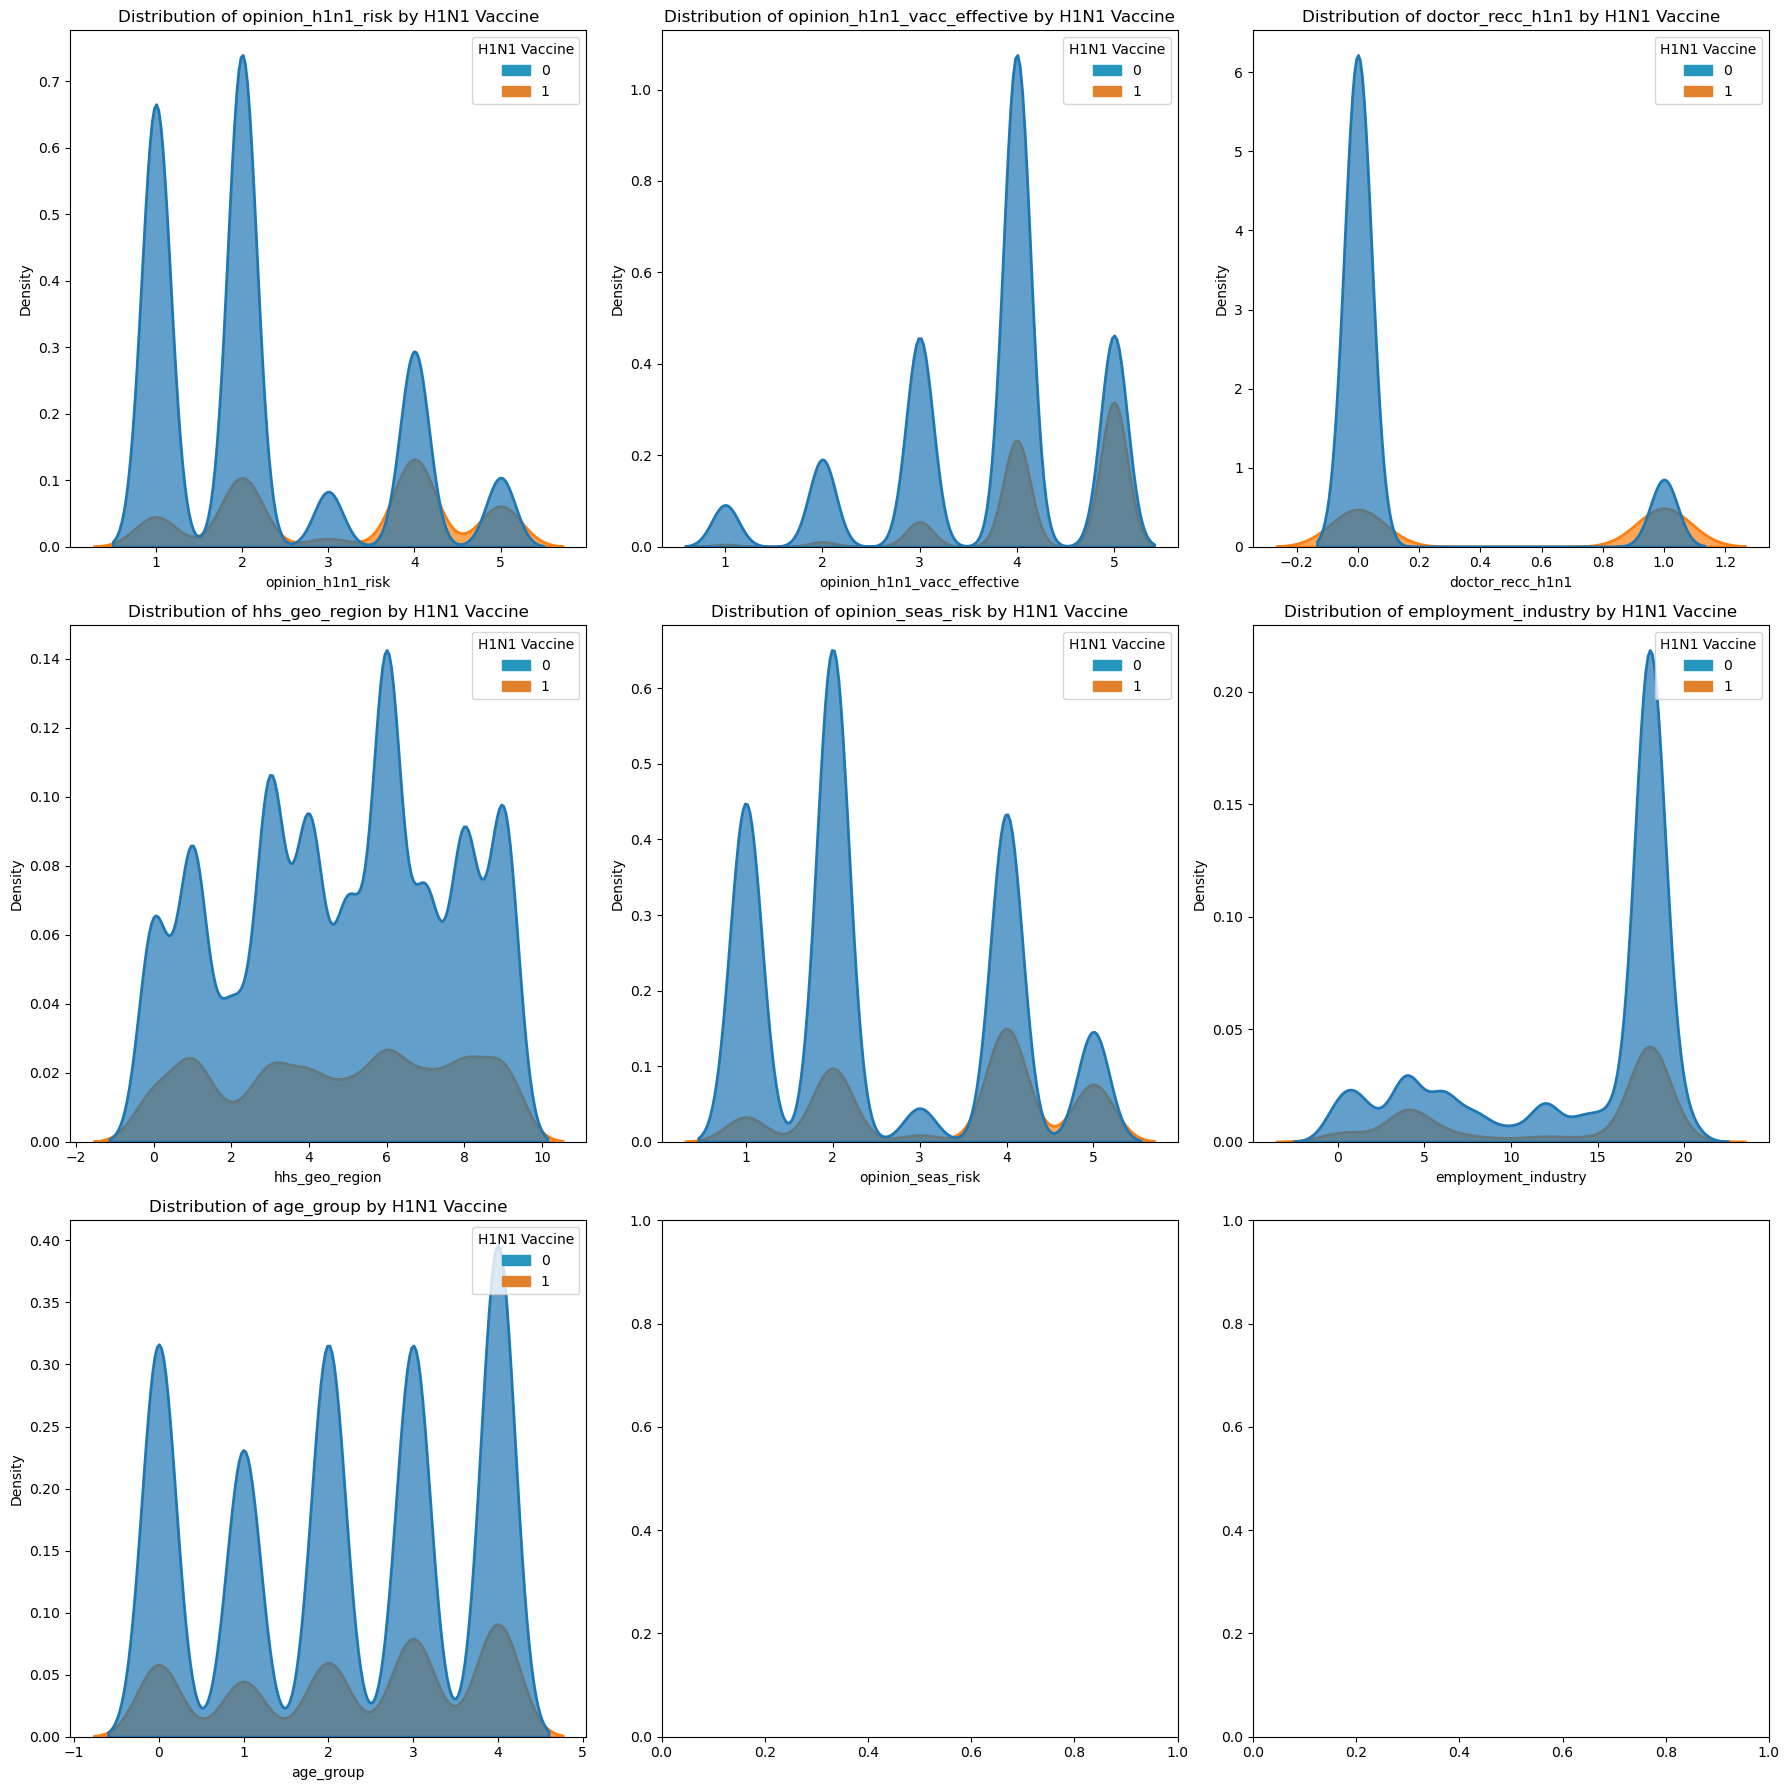

In [17]:
num_features = len(features)
num_rows = (num_features - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

# Creating Density plots for all feauters
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    sns.kdeplot(data=df_trainV2, x=feature, hue='h1n1_vaccine', fill=True, ax=ax, linewidth=2, alpha=0.7)
    ax.set_title(f'Distribution of {feature} by H1N1 Vaccine')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

    legend_handles = [
        mpatches.Patch(color='#2596be', label='0'),
        mpatches.Patch(color='#e1812c', label='1')
    ]
    ax.legend(handles=legend_handles, title='H1N1 Vaccine', loc='upper right')

plt.tight_layout()
plt.show()

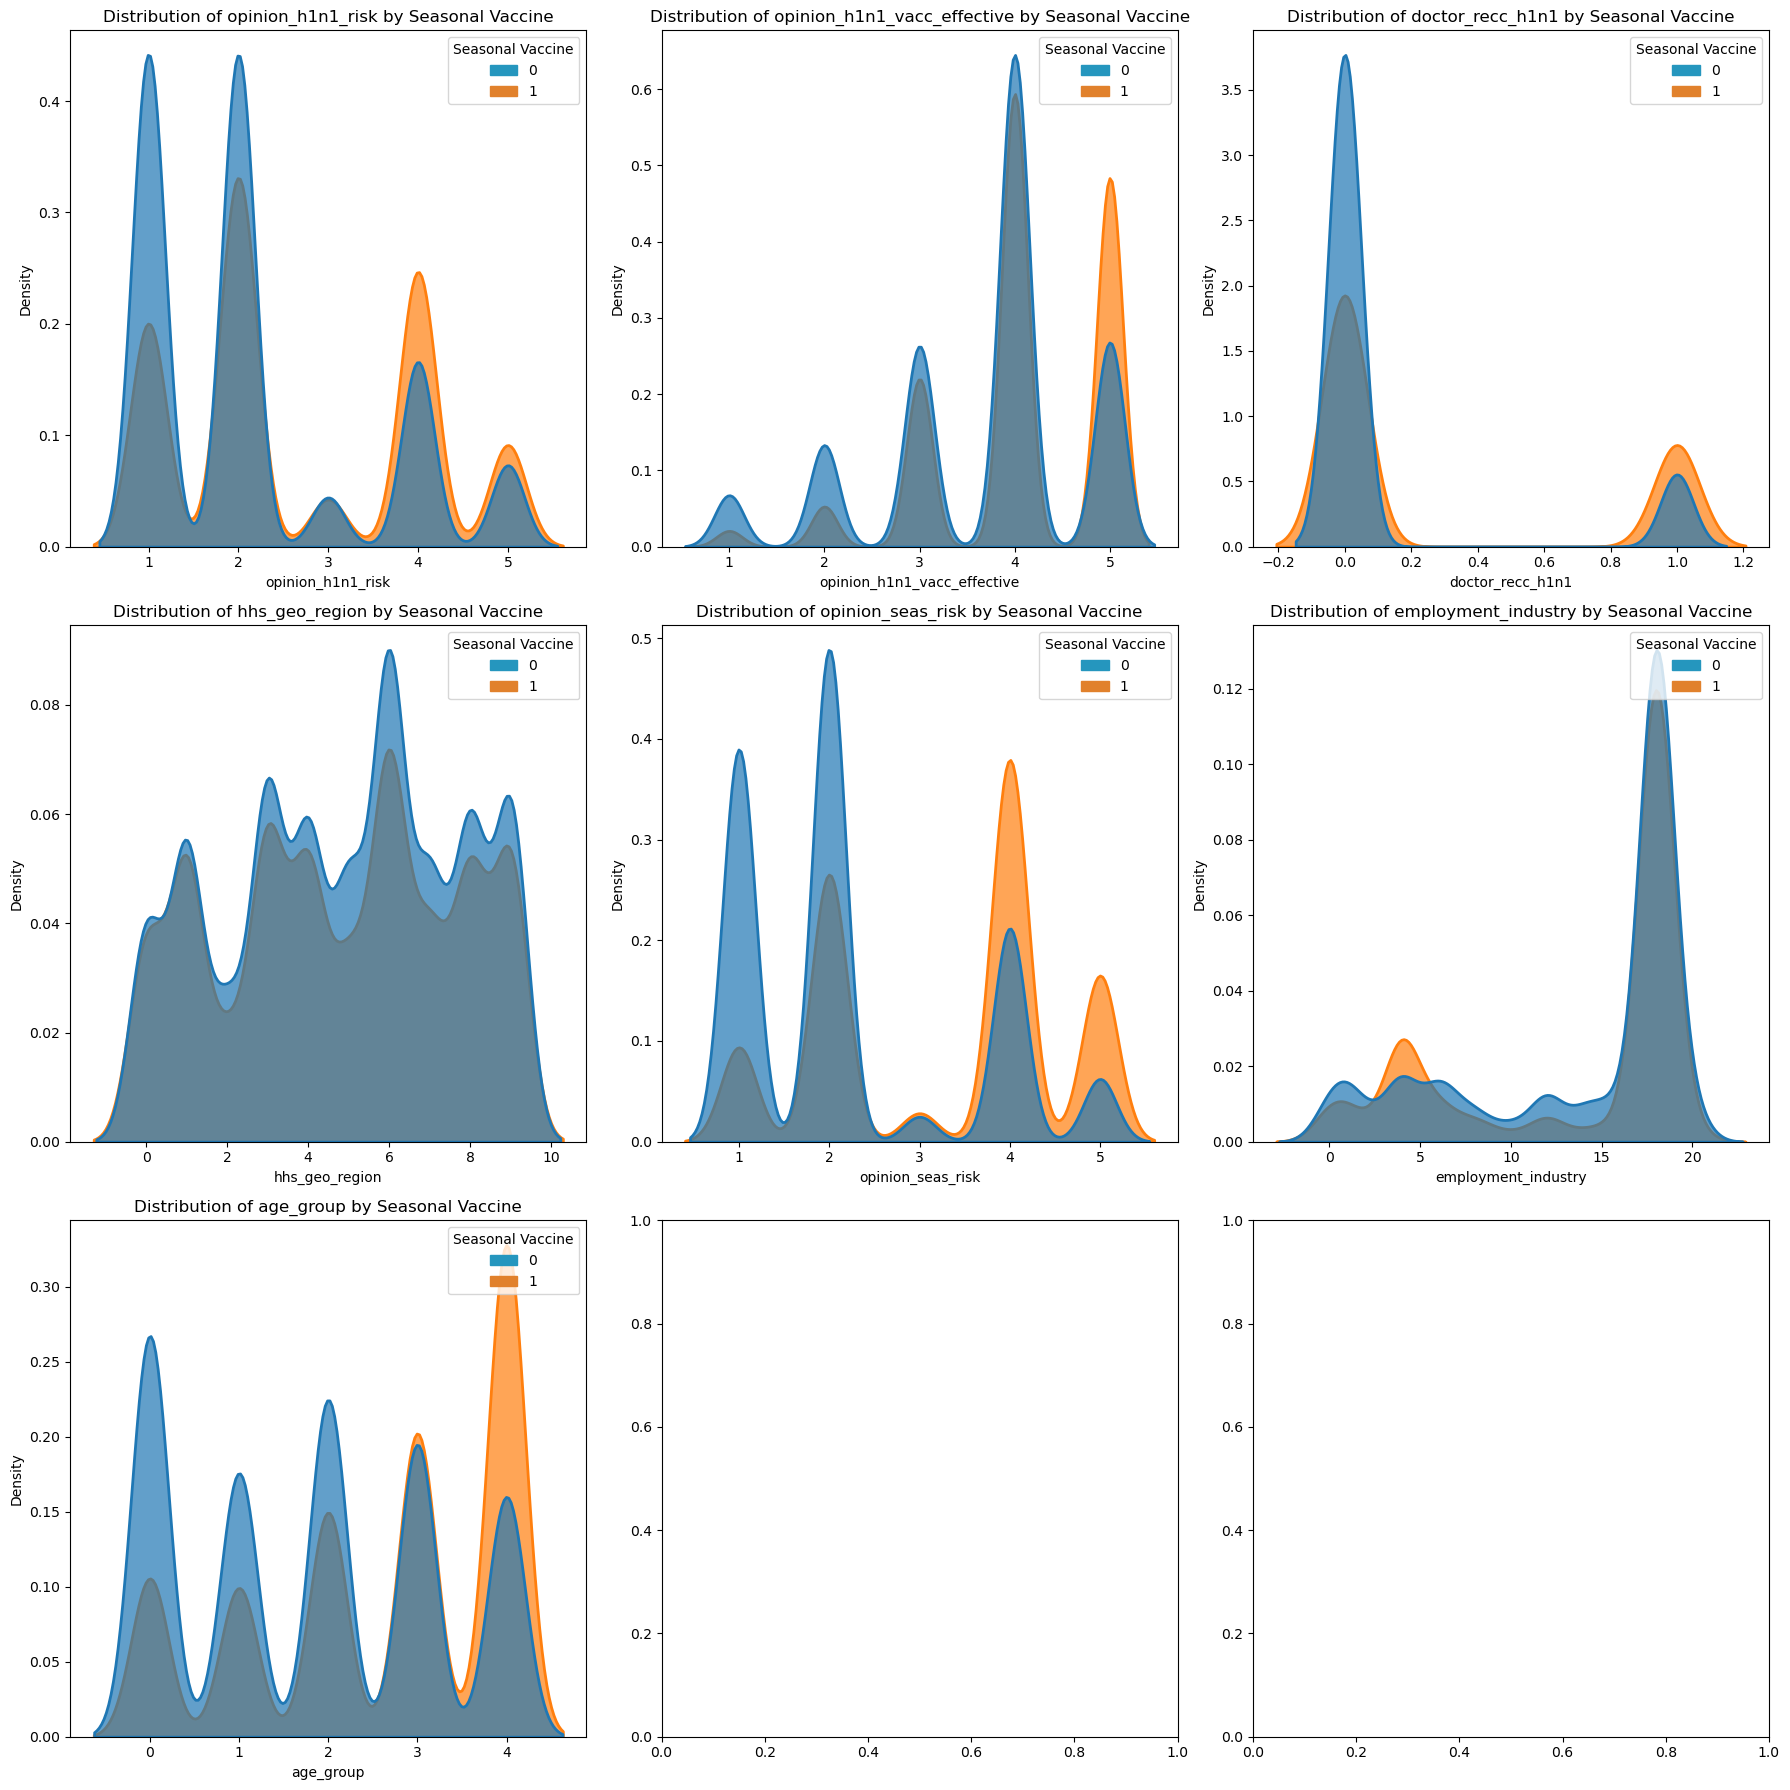

In [18]:
num_features = len(features)
num_rows = (num_features - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

# Creating Density plots for all feauters
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    sns.kdeplot(data=df_trainV2, x=feature, hue='seasonal_vaccine', fill=True, ax=ax, linewidth=2, alpha=0.7)
    ax.set_title(f'Distribution of {feature} by Seasonal Vaccine')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

    legend_handles = [
        mpatches.Patch(color='#2596be', label='0'),
        mpatches.Patch(color='#e1812c', label='1')
    ]
    ax.legend(handles=legend_handles, title='Seasonal Vaccine', loc='upper right')

plt.tight_layout()
plt.show()

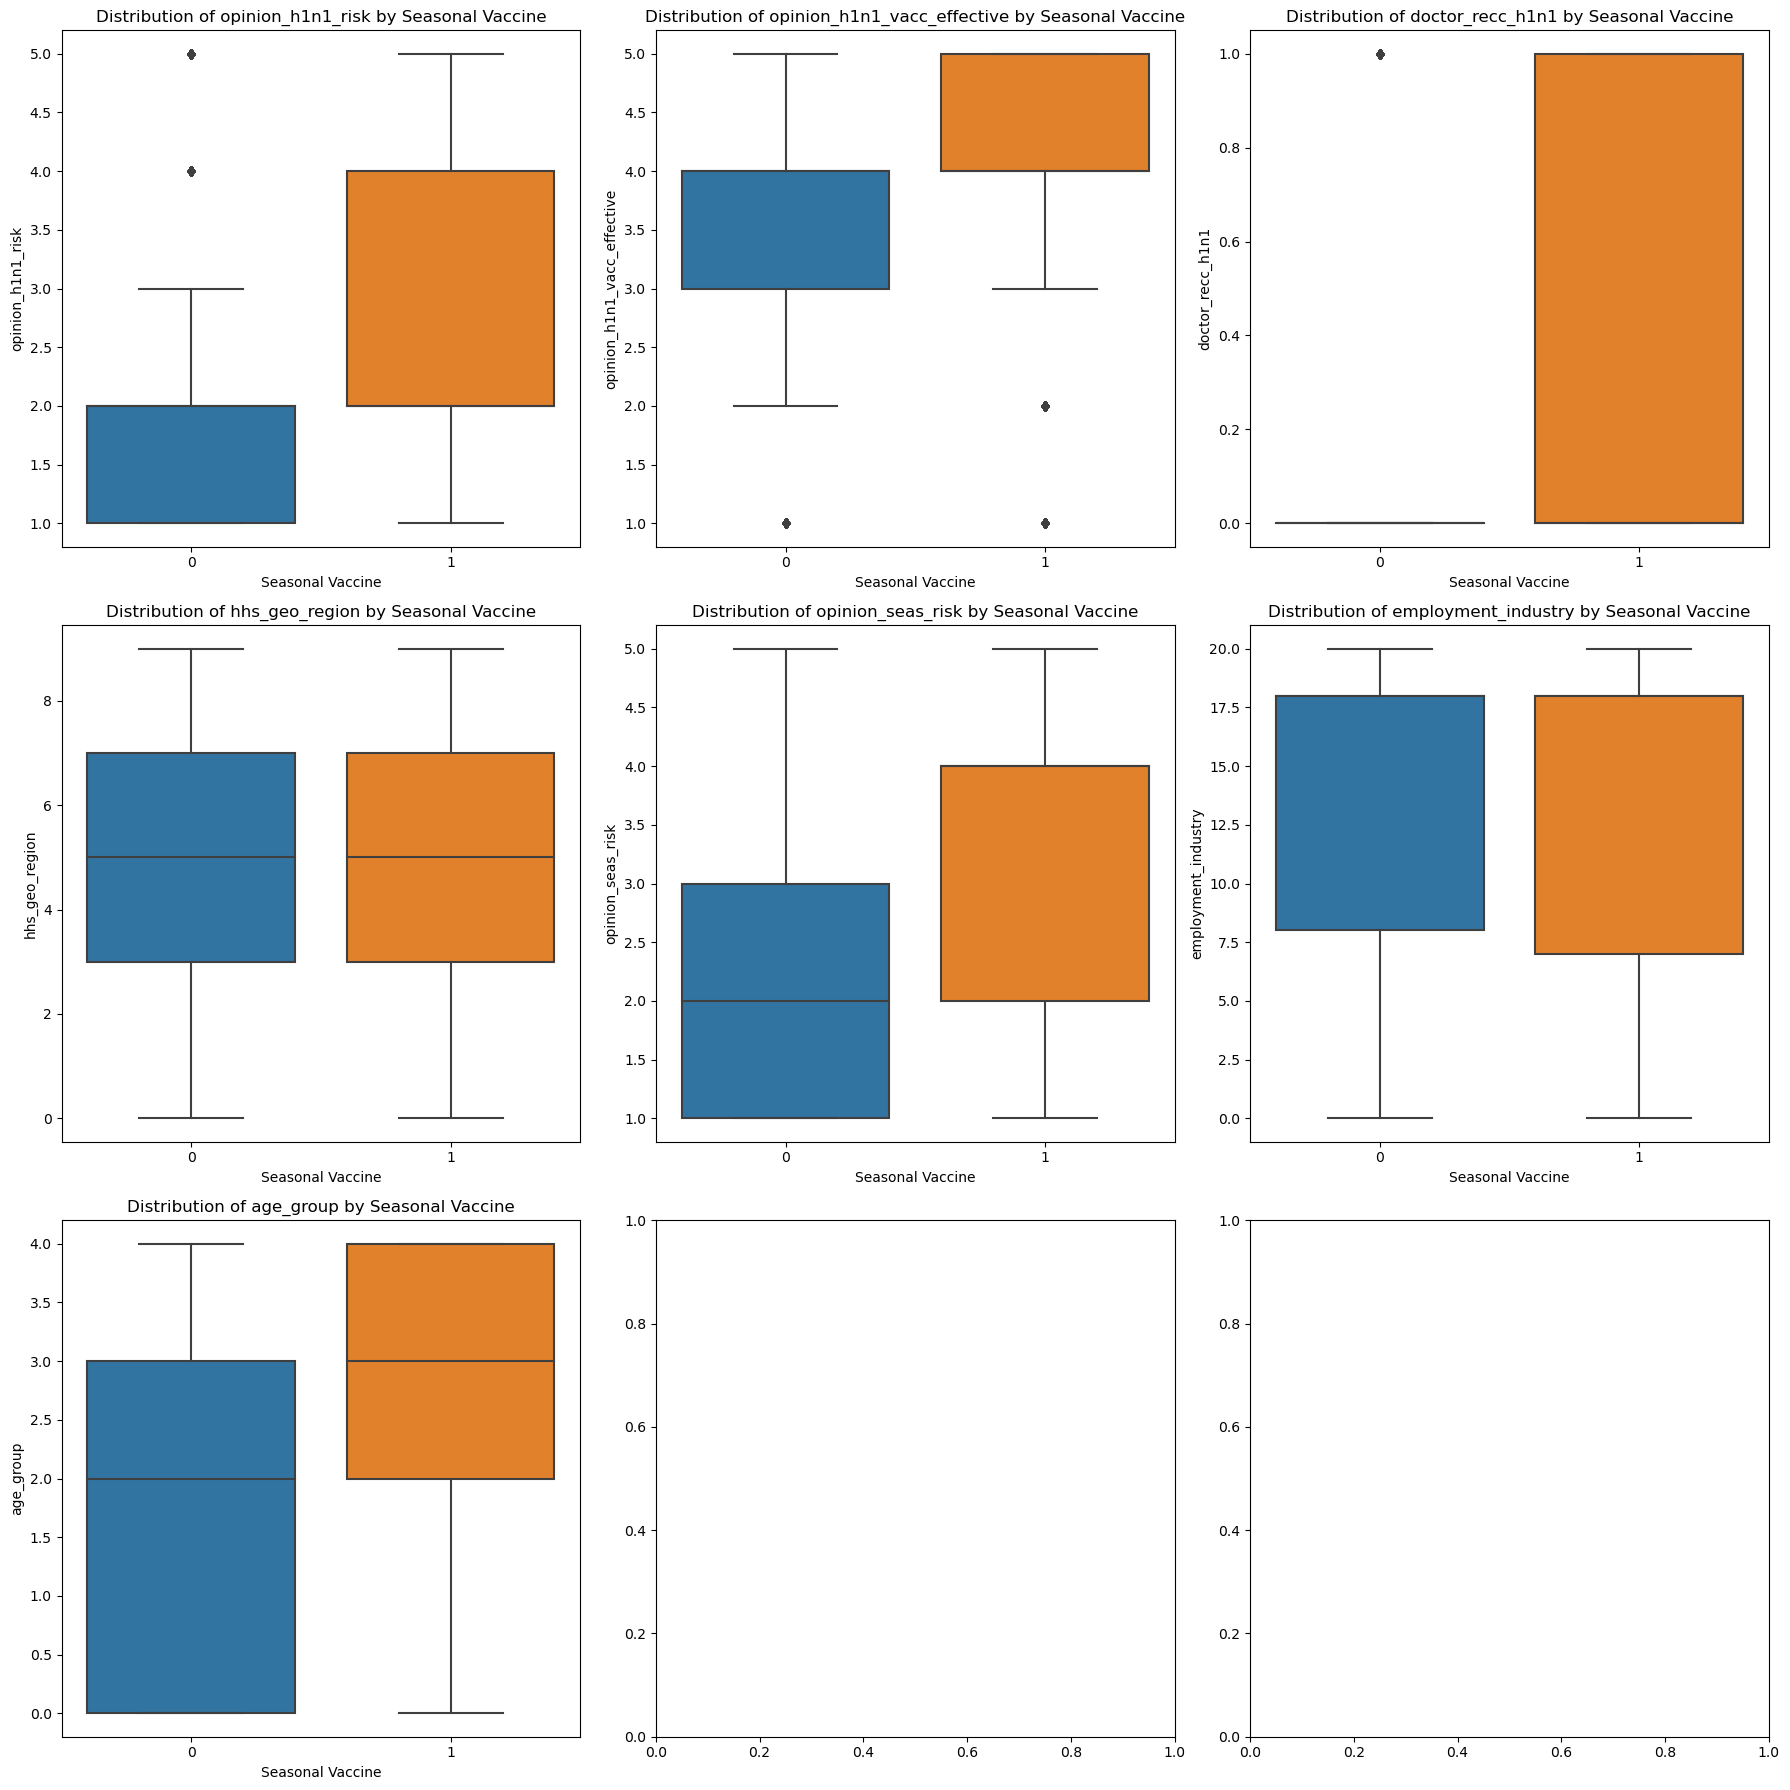

In [19]:
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    sns.boxplot(data=df_trainV2, x='seasonal_vaccine', y=feature, ax=ax)
    ax.set_title(f'Distribution of {feature} by Seasonal Vaccine')
    ax.set_xlabel('Seasonal Vaccine')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()


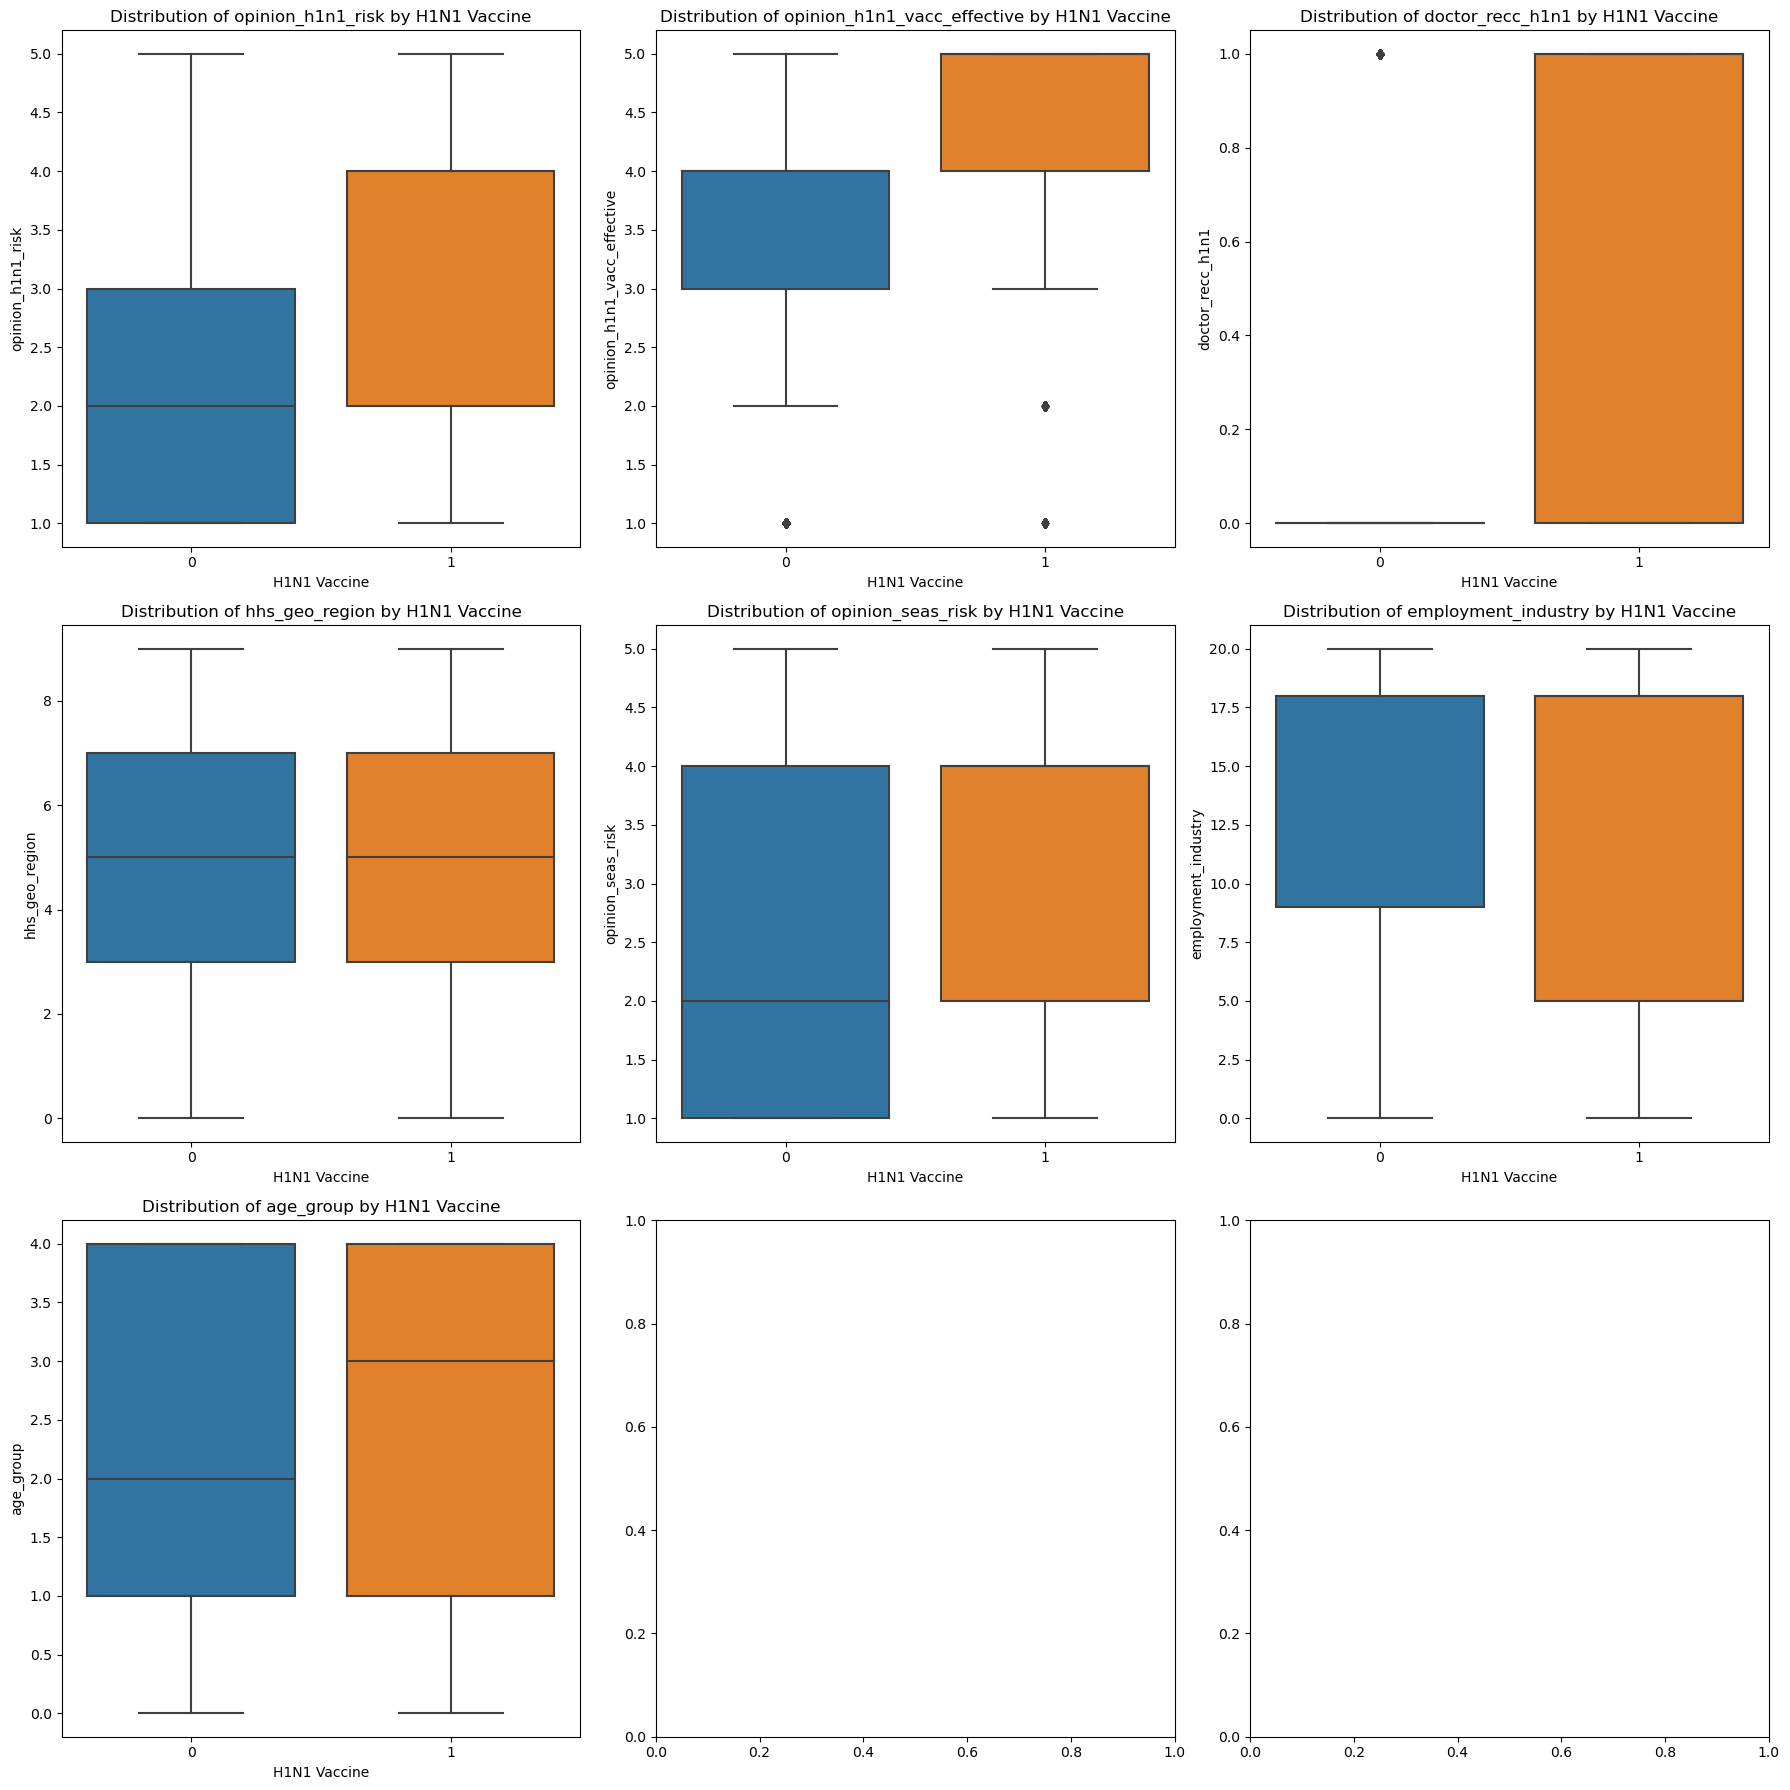

In [20]:
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    sns.boxplot(data=df_trainV2, x='h1n1_vaccine', y=feature, ax=ax)
    ax.set_title(f'Distribution of {feature} by H1N1 Vaccine')
    ax.set_xlabel('H1N1 Vaccine')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()


Standardisation using X = (X - X.mean()) / X.std())
* Used to scale the encoded numerical data

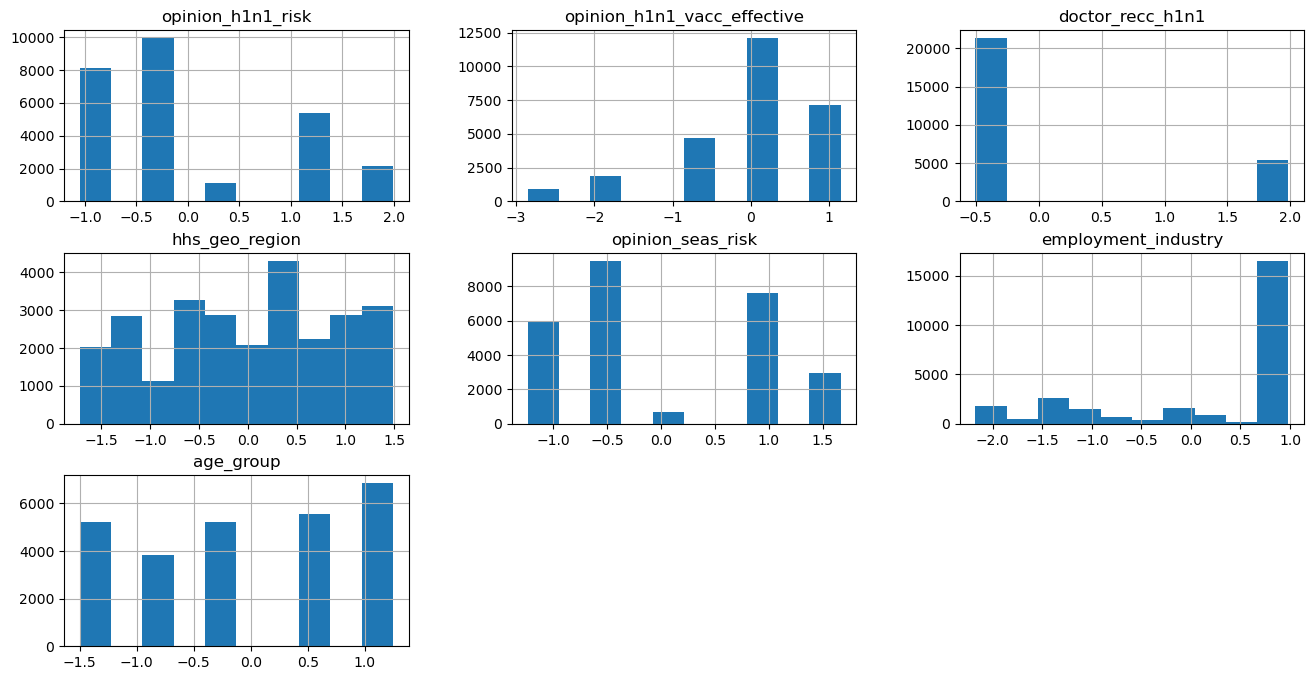

In [21]:
X_V2 = df_trainV2[features]
X_V2_scaled = (X_V2 - X_V2.mean()) / X_V2.std()

X_V2_scaled.hist(figsize=(16, 8))
plt.show()

## Preparing Training and test data

Selecting relevant featurers then:
* Split data into features and target
* Split data into training and testing set (for evaluation)

In [44]:
#Features and targets
X_train_V2 = df_trainV2.drop(['h1n1_vaccine','seasonal_vaccine'], axis =1)
y_h1n1_V2 = df_labelsV2['h1n1_vaccine']
y_seasonal_V2 = df_labelsV2['seasonal_vaccine']

#training testing sets
X_train_h1n1_V2, X_test_h1n1_V2, y_train_h1n1_V2, y_test_h1n1_V2 = train_test_split(X_V2_scaled, y_h1n1_V2, test_size=0.2, random_state=42)
X_train_seasonal_V2, X_test_seasonal_V2, y_train_seasonal_V2, y_test_seasonal_V2 = train_test_split(X_V2_scaled, y_seasonal_V2, test_size=0.25, random_state=42)

Now that the data is pre processed and split for testing and training I will be testing the sets on two models:
* Random Forest Model
* Support Vector Machine Model

## Random Forest Tuning

Utilising a randomised search to find the best hyper tuned parameters 

In [30]:
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Perform randomized search with 5-fold cross-validation for h1n1_vaccine
h1n1_random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, verbose = 10)
h1n1_random_search.fit(X_train_h1n1_V2, y_train_h1n1_V2)

seasonal_random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, verbose =10)
seasonal_random_search.fit(X_train_seasonal_V2, y_train_seasonal_V2)


print("Best Hyperparameters for h1n1_vaccine:")
print(h1n1_random_search.best_params_)
print("Best Score for h1n1_vaccine:", h1n1_random_search.best_score_)

print("\nBest Hyperparameters for seasonal_vaccine:")
print(seasonal_random_search.best_params_)
print("Best Score for seasonal_vaccine:", seasonal_random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=206
[CV 1/5; 1/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=206;, score=0.826 total time=   1.8s
[CV 2/5; 1/10] START max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=206
[CV 2/5; 1/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=206;, score=0.833 total time=   1.7s
[CV 3/5; 1/10] START max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=206
[CV 3/5; 1/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=206;, score=0.830 total time=   1.6s
[CV 4/5; 1/10] START max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=206
[CV 4/5; 1/10] END max_depth=10, max_features=log2, min_sample

[CV 3/5; 7/10] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=335;, score=0.823 total time=   3.3s
[CV 4/5; 7/10] START max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=335
[CV 4/5; 7/10] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=335;, score=0.826 total time=   3.4s
[CV 5/5; 7/10] START max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=335
[CV 5/5; 7/10] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=335;, score=0.830 total time=   3.6s
[CV 1/5; 8/10] START max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=269
[CV 1/5; 8/10] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=269;, score=0.825 total time=   2.6s
[CV 2/5; 8/10] START max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_

[CV 5/5; 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=187;, score=0.735 total time=   1.3s
[CV 1/5; 4/10] START max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=230
[CV 1/5; 4/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=230;, score=0.732 total time=   2.0s
[CV 2/5; 4/10] START max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=230
[CV 2/5; 4/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=230;, score=0.713 total time=   1.9s
[CV 3/5; 4/10] START max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=230
[CV 3/5; 4/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=230;, score=0.733 total time=   1.9s
[CV 4/5; 4/10] START max_depth=None, max_features=log2, min_samples_leaf=4, min_

[CV 3/5; 10/10] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=150;, score=0.732 total time=   1.1s
[CV 4/5; 10/10] START max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=150
[CV 4/5; 10/10] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=150;, score=0.721 total time=   1.2s
[CV 5/5; 10/10] START max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=150
[CV 5/5; 10/10] END max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=150;, score=0.730 total time=   0.8s
Best Hyperparameters for h1n1_vaccine:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 187}
Best Score for h1n1_vaccine: 0.8319681722443247

Best Hyperparameters for seasonal_vaccine:
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 2

## Random Forest Evaluation

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_h1n1_vaccine = RandomForestClassifier(n_estimators=187, max_depth=10, max_features='sqrt', min_samples_leaf=3, min_samples_split=4, random_state=42)
rf_h1n1_vaccine.fit(X_train_h1n1_V2, y_train_h1n1_V2)

rf_seasonal_vaccine = RandomForestClassifier(n_estimators=206, max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=8, random_state=42)
rf_seasonal_vaccine.fit(X_train_seasonal_V2, y_train_seasonal_V2)

# Perform k-fold cross-validation 
h1n1_cv_scores = cross_val_score(rf_h1n1_vaccine, X_train_h1n1_V2, y_train_h1n1_V2, cv=5)
seasonal_cv_scores = cross_val_score(rf_seasonal_vaccine, X_train_seasonal_V2, y_train_seasonal_V2, cv=5)


print("5 Fold Cross-Validation Scores for h1n1_vaccine:")
for i, score in enumerate(h1n1_cv_scores):
    print("Fold", i+1, "Score:", score)
print("Average Score for h1n1_vaccine:", h1n1_cv_scores.mean())

print()

print("5 Fold Cross-Validation Scores for seasonal_vaccine:")
for i, score in enumerate(seasonal_cv_scores):
    print("Fold", i+1, "Score:", score)
print("Average Score for seasonal_vaccine:", seasonal_cv_scores.mean())

5 Fold Cross-Validation Scores for h1n1_vaccine:
Fold 1 Score: 0.8275216475544114
Fold 2 Score: 0.8350105312426866
Fold 3 Score: 0.8312660893985491
Fold 4 Score: 0.8296278960917388
Fold 5 Score: 0.8364146969342382
Average Score for h1n1_vaccine: 0.8319681722443247

5 Fold Cross-Validation Scores for seasonal_vaccine:
Fold 1 Score: 0.7333999001497753
Fold 2 Score: 0.7256615077383924
Fold 3 Score: 0.7381427858212681
Fold 4 Score: 0.7216674987518722
Fold 5 Score: 0.7348976535197205
Average Score for seasonal_vaccine: 0.7307538691962059


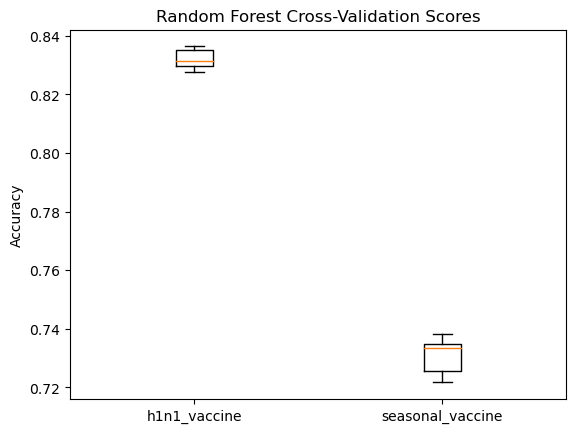

In [34]:
cv_scores = [h1n1_cv_scores, seasonal_cv_scores]

fig, ax = plt.subplots()
ax.boxplot(cv_scores)

ax.set_xticklabels(['h1n1_vaccine', 'seasonal_vaccine'])
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Cross-Validation Scores')
 
# Show the plot
plt.show()

Evaluating the performance by looking at Accuracy, Precision, Recall, And F1 - Score

In [35]:
classifier = RandomForestClassifier()
y_pred_h1n1 = cross_val_predict(classifier, X_test_h1n1_V2, y_test_h1n1_V2, cv=5)
report_h1n1 = classification_report(y_test_h1n1_V2, y_pred_h1n1)
print("Evaluation Report using RF classifier")
print('H1N1 Vaccine Evaluation:')
print(report_h1n1)
print()

y_pred_seasonal = cross_val_predict(classifier, X_test_seasonal_V2, y_test_seasonal_V2, cv=5)
report_seasonal = classification_report(y_test_seasonal_V2, y_pred_seasonal)
print('Seasonal Vaccine Evaluation:')
print(report_seasonal)


Evaluation Report using RF classifier
H1N1 Vaccine Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4212
           1       0.53      0.41      0.47      1130

    accuracy                           0.80      5342
   macro avg       0.69      0.66      0.67      5342
weighted avg       0.78      0.80      0.79      5342


Seasonal Vaccine Evaluation:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3634
           1       0.67      0.66      0.66      3043

    accuracy                           0.70      6677
   macro avg       0.69      0.69      0.69      6677
weighted avg       0.70      0.70      0.70      6677



Confusionn


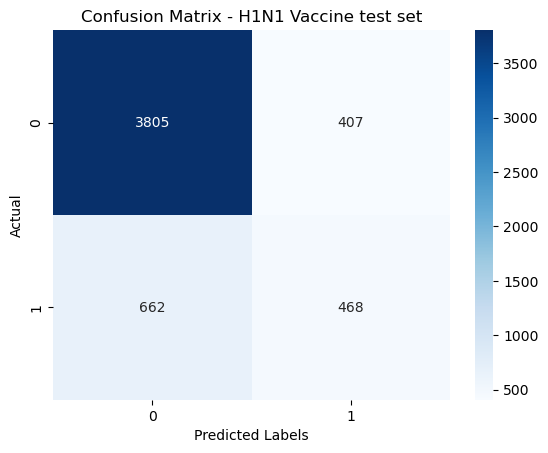

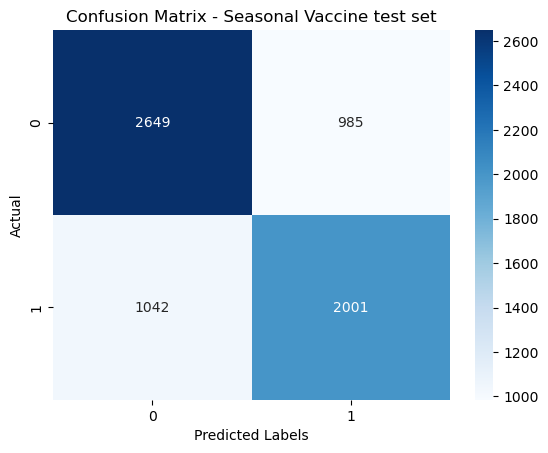

In [36]:
confusion_matrix_h1n1 = confusion_matrix(y_test_h1n1_V2, y_pred_h1n1)
confusion_matrix_seasonal = confusion_matrix(y_test_seasonal_V2, y_pred_seasonal)

print("Confusionn")
sns.heatmap(confusion_matrix_h1n1, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - H1N1 Vaccine test set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")
plt.show()

sns.heatmap(confusion_matrix_seasonal, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Seasonal Vaccine test set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")
plt.show()


In [1]:
# ROC Evaluation
y_scores_h1n1 = cross_val_predict(classifier, X_test_h1n1_V2, y_test_h1n1_V2, cv=5, method='predict_proba')[:, 1]
fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test_h1n1_V2, y_scores_h1n1)
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

y_scores_seasonal = cross_val_predict(classifier, X_test_seasonal_V2, y_test_seasonal_V2, cv=5, method='predict_proba')[:, 1]
fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test_seasonal_V2, y_scores_seasonal)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)


plt.plot(fpr_seasonal, tpr_seasonal, label='Seasonal Vaccine (AUC = %0.2f)' % roc_auc_seasonal)
plt.plot(fpr_h1n1, tpr_h1n1, label='H1N1 Vaccine (AUC = %0.2f)' % roc_auc_h1n1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


NameError: name 'cross_val_predict' is not defined

# SVM Tuning 

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

svm_classifier = SVC()
param_grid = {
    'C': [0.1, 1], #Chose a smaller range to speed up search
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Grid search 
grid_search_h1n1 = GridSearchCV(svm_classifier, param_grid, cv=3, verbose=10)
grid_search_seasonal = GridSearchCV(svm_classifier, param_grid, cv=3, verbose=10)

# Fitting data 
grid_search_h1n1.fit(X_train_h1n1_V2, y_train_h1n1_V2)
grid_search_seasonal.fit(X_train_seasonal_V2, y_train_seasonal_V2)

print("Best Hyperparameters for h1n1_vaccine:")
print(grid_search_h1n1.best_params_)
print("Best Score for h1n1_vaccine:", grid_search_h1n1.best_score_)

print("\nBest Hyperparameters for seasonal_vaccine:")
print(grid_search_seasonal.best_params_)
print("Best Score for seasonal_vaccine:", grid_search_seasonal.best_score_)

best_svm_h1n1 = grid_search_h1n1.best_estimator_
best_svm_seasonal = grid_search_seasonal.best_estimator_


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START C=0.1, gamma=scale, kernel=linear...........................
[CV 1/3; 1/4] END C=0.1, gamma=scale, kernel=linear;, score=0.811 total time=   5.2s
[CV 2/3; 1/4] START C=0.1, gamma=scale, kernel=linear...........................
[CV 2/3; 1/4] END C=0.1, gamma=scale, kernel=linear;, score=0.797 total time=   5.3s
[CV 3/3; 1/4] START C=0.1, gamma=scale, kernel=linear...........................
[CV 3/3; 1/4] END C=0.1, gamma=scale, kernel=linear;, score=0.821 total time=   5.5s
[CV 1/3; 2/4] START C=0.1, gamma=scale, kernel=rbf..............................
[CV 1/3; 2/4] END C=0.1, gamma=scale, kernel=rbf;, score=0.824 total time=  11.6s
[CV 2/3; 2/4] START C=0.1, gamma=scale, kernel=rbf..............................
[CV 2/3; 2/4] END C=0.1, gamma=scale, kernel=rbf;, score=0.825 total time=  11.7s
[CV 3/3; 2/4] START C=0.1, gamma=scale, kernel=rbf..............................
[CV 3/3; 2/4] END C=0.1, gamma=scal

# SVM Evaluation

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score

# Train SVM models with different kernels
kernels = ['linear', 'poly', 'sigmoid', 'rbf']

# For h1n1_vaccine
print("Evaluation for h1n1_vaccine:")
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train_h1n1_V2, y_train_h1n1_V2)

    # Predict the labels for the testing set
    y_pred = clf.predict(X_test_h1n1_V2)

    # Calculate the precision and recall
    precision = precision_score(y_test_h1n1_V2, y_pred)
    recall = recall_score(y_test_h1n1_V2, y_pred)
    accuracy = clf.score(X_test_h1n1_V2, y_test_h1n1_V2)

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}\n")

# For seasonal_vaccine
print("Evaluation for seasonal_vaccine:")
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train_seasonal_V2, y_train_seasonal_V2)

    # Predict the labels for the testing set
    y_pred = clf.predict(X_test_seasonal_V2)

    # Calculate the precision and recall
    precision = precision_score(y_test_seasonal_V2, y_pred)
    recall = recall_score(y_test_seasonal_V2, y_pred)
    accuracy = clf.score(X_test_seasonal_V2, y_test_seasonal_V2)

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}\n")


Evaluation for h1n1_vaccine:
Kernel: linear
Accuracy: 0.818
Precision: 0.585
Recall: 0.475

Kernel: poly
Accuracy: 0.831
Precision: 0.669
Recall: 0.394

Kernel: sigmoid
Accuracy: 0.751
Precision: 0.413
Recall: 0.420

Kernel: rbf
Accuracy: 0.833
Precision: 0.670
Recall: 0.418

Evaluation for seasonal_vaccine:
Kernel: linear
Accuracy: 0.730
Precision: 0.726
Recall: 0.655

Kernel: poly
Accuracy: 0.720
Precision: 0.740
Recall: 0.596

Kernel: sigmoid
Accuracy: 0.638
Precision: 0.602
Recall: 0.609

Kernel: rbf
Accuracy: 0.744
Precision: 0.718
Recall: 0.722



In [50]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Classifier with hyper parameter recommendations
svm_h1n1 = SVC(C=1, gamma='scale', kernel='rbf')
svm_seasonal = SVC(C=1, gamma='scale', kernel='rbf')

svm_h1n1.fit(X_train_h1n1_V2, y_train_h1n1_V2)
svm_seasonal.fit(X_train_seasonal_V2, y_train_seasonal_V2)

y_pred_h1n1 = svm_h1n1.predict(X_test_h1n1_V2)
y_pred_seasonal = svm_seasonal.predict(X_test_seasonal_V2)


print("Evaluation for h1n1_vaccine:")
print(classification_report(y_test_h1n1_V2, y_pred_h1n1))
print("Evaluation for seasonal_vaccine:")
print(classification_report(y_test_seasonal_V2, y_pred_seasonal))


Evaluation for h1n1_vaccine:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4212
           1       0.67      0.42      0.51      1130

    accuracy                           0.83      5342
   macro avg       0.76      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342

Evaluation for seasonal_vaccine:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      3634
           1       0.72      0.72      0.72      3043

    accuracy                           0.74      6677
   macro avg       0.74      0.74      0.74      6677
weighted avg       0.74      0.74      0.74      6677



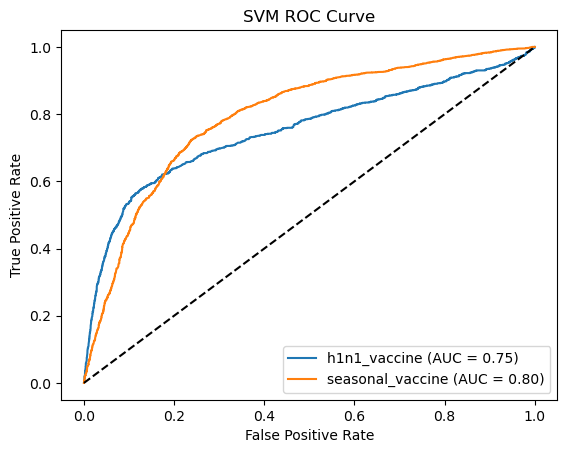

In [57]:
#Predictions 
y_scores_h1n1 = svm_h1n1.decision_function(X_test_h1n1_V2)
y_scores_seasonal = svm_seasonal.decision_function(X_test_seasonal_V2)

# False Positive rate calculation
fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test_h1n1_V2, y_scores_h1n1)
fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test_seasonal_V2, y_scores_seasonal)

# AUC caluclations 
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot ROC 
plt.plot(fpr_h1n1, tpr_h1n1, label='h1n1_vaccine (AUC = %0.2f)' % roc_auc_h1n1)
plt.plot(fpr_seasonal, tpr_seasonal, label='seasonal_vaccine (AUC = %0.2f)' % roc_auc_seasonal)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


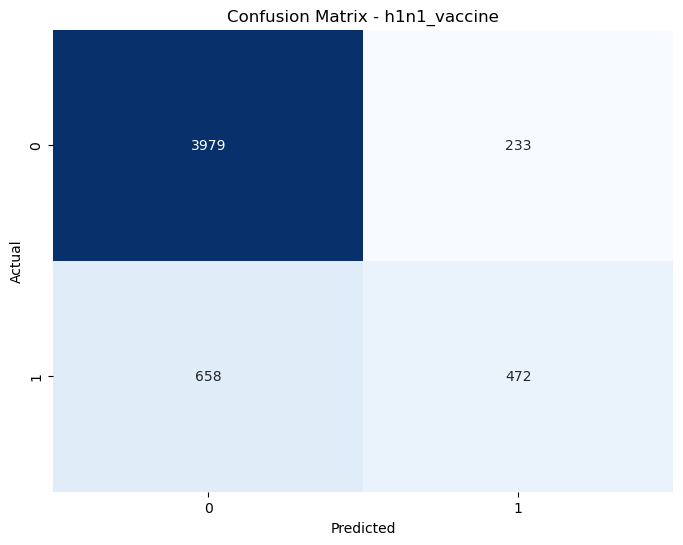

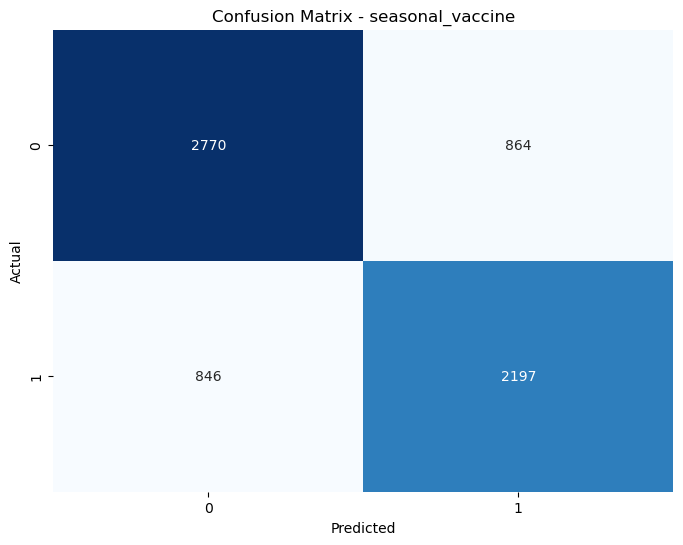

In [56]:
# Confusion matrix
cm_h1n1 = confusion_matrix(y_test_h1n1_V2, y_pred_h1n1)
cm_seasonal = confusion_matrix(y_test_seasonal_V2, y_pred_seasonal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - h1n1_vaccine')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - seasonal_vaccine')
plt.show()
